To check: absolute evaluation --> Is a given model A appropriate for an outcome Y?
Calibration of mean forecasts:testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from energy_consumption.models.regression_models.lasso_regression import get_lasso_forecasts

In [4]:
hist_energydata = pd.read_csv(
    'c:\\Users\\Maria\\Documents\\Studium\\Pyhton Projekte\\PTSFC\\energy_consumption\\historical_data.csv')
hist_energydata['date_time'] = pd.to_datetime(hist_energydata['date_time'], format='%Y-%m-%d %H:%M:%S')
hist_energydata = hist_energydata.set_index("date_time")

In [5]:
hist_energydata

,energy_consumption
date_time,
2016-12-26 00:00:00,41.81025
2016-12-26 01:00:00,39.73950
2016-12-26 02:00:00,38.78525
2016-12-26 03:00:00,38.96900
2016-12-26 04:00:00,39.18750
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [3]:
lasso_forecasts = get_lasso_forecasts(hist_energydata.iloc[:-20],indexes=list(range(20)), periods=20)
#lasso_forecasts = lasso_forecasts.copy().set_index('date_time').drop(columns={'forecast_date', 'target', 'horizon'})
lasso_forecasts


C:\Users\Maria\Documents\Studium\Pyhton Projekte\PTSFC\energy_consumption\help_functions\dummy_mapping.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['month'] = energy_df.index.month


KeyError: "['target', 'horizon', 'forecast_date'] not found in axis"

In [6]:
obs = hist_energydata.iloc[-20:]
obs

,energy_consumption
date_time,
2023-11-21 17:00:00,66.51400
2023-11-21 18:00:00,65.87825
2023-11-21 19:00:00,64.66250
2023-11-21 20:00:00,61.34150
2023-11-21 21:00:00,58.55325
2023-11-21 22:00:00,55.17675
2023-11-21 23:00:00,51.46875
2023-11-22 00:00:00,48.76400
2023-11-22 01:00:00,46.81425


Visualize prediction intervals

False

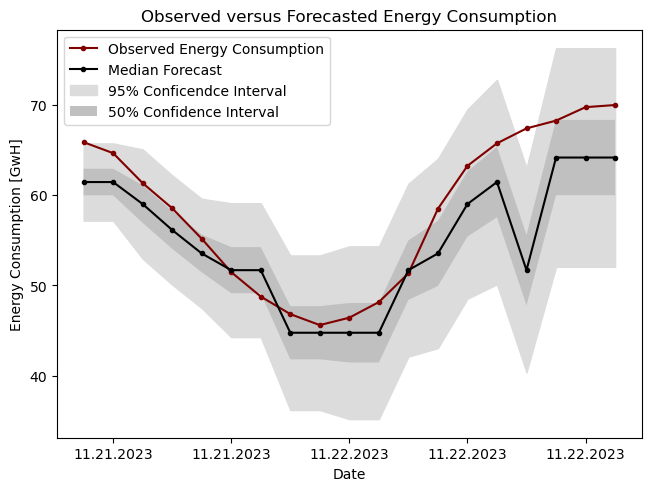

In [19]:
dates = obs.index
dates = np.array(dates.strftime("%m.%d.%Y"))
x = np.array(range(len(dates)-1))

# determine 5 xticks
quotient = round(len(dates)/5)
ticks = [int(i * quotient - quotient * 0.7) for i in range(1, 6)]

# make figure + axes
fig, ax = plt.subplots(layout='constrained')
ax.set(title="Observed versus Forecasted Energy Consumption", 
       xlabel="Date", 
       ylabel="Energy Consumption [GwH]")

# plot observed ec and median ec
ax.plot(x, obs[1:], marker=".", color='maroon', label='Observed Energy Consumption')
ax.plot(x, lasso_forecasts['q0.5'][1:], marker='.', color='black', label='Median Forecast')

# fill in confidence intervals
ax.fill_between(x, lasso_forecasts['q0.025'][1:],
                lasso_forecasts['q0.975'][1:],
                color='gainsboro', label = '95% Conficendce Interval')
ax.fill_between(x, lasso_forecasts['q0.25'][1:],
                lasso_forecasts['q0.75'][1:],
                color='silver', edgecolor=None,label = '50% Confidence Interval')

# set x-axis ticks directly using dates
ax.set_xticks(ticks, labels=[dates[i] for i in ticks])
ax.legend()
len(dates) == len(x)

# Next: Plot CDF/PDF(Standardized/Non-Standardized) vs Lasso function

In [27]:
obs2 = np.array(hist_energydata.iloc[-100:][1:])
obs2

array([[55.118  ],
       [55.89625],
       [56.03125],
       [54.85875],
       [54.03775],
       [54.28925],
       [55.77425],
       [58.54225],
       [58.33775],
       [56.8755 ],
       [54.40575],
       [52.05375],
       [50.48425],
       [47.3975 ],
       [44.91425],
       [42.96475],
       [41.60025],
       [40.9935 ],
       [40.8295 ],
       [40.901  ],
       [40.542  ],
       [42.59325],
       [45.9625 ],
       [49.45375],
       [52.108  ],
       [54.771  ],
       [54.44925],
       [52.544  ],
       [50.7595 ],
       [50.14225],
       [52.1465 ],
       [55.3035 ],
       [55.81075],
       [53.792  ],
       [51.23925],
       [48.5325 ],
       [47.249  ],
       [44.68575],
       [42.22825],
       [39.8605 ],
       [38.92775],
       [39.454  ],
       [41.419  ],
       [45.78525],
       [54.652  ],
       [61.18975],
       [63.7055 ],
       [64.491  ],
       [65.91475],
       [67.06075],
       [66.42675],
       [65.38475],
       [63.3

In [21]:
quantiles = np.linspace(0.1,0.9,9)
quantiles

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [19]:
lasso_forecasts2 = get_lasso_forecasts(
    hist_energydata.iloc[:-100], indexes=list(range(100)), quantiles=quantiles, periods=100)
lasso_forecasts2 = lasso_forecasts2.set_index('date_time')
lasso_forecasts2 = lasso_forecasts2.rename(
    columns={"q0.30000000000000004": 'q0.3', 'q0.7000000000000001': 'q0.7'})
lasso_forecasts2

,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9
date_time,,,,,,,,,
2023-11-18 09:00:00,51.698670,51.698670,51.698670,51.698670,51.698670,51.698670,51.698670,51.698670,51.698670
2023-11-18 10:00:00,61.391770,62.353818,63.047522,63.640267,64.194291,64.748316,65.341061,66.034765,66.996813
2023-11-18 11:00:00,61.391770,62.353818,63.047522,63.640267,64.194291,64.748316,65.341061,66.034765,66.996813
2023-11-18 12:00:00,60.230927,61.591469,62.572515,63.410783,64.194291,64.977800,65.816068,66.797114,68.157656
2023-11-18 13:00:00,59.051439,60.411981,61.393027,62.231295,63.014804,63.798312,64.636580,65.617626,66.978168
...,...,...,...,...,...,...,...,...,...
2023-11-22 08:00:00,43.749493,49.834020,54.221392,57.970239,61.474197,64.978154,68.727002,73.114373,79.198900
2023-11-22 09:00:00,33.973966,40.058493,44.445865,48.194712,51.698670,55.202627,58.951475,63.338846,69.423373
2023-11-22 10:00:00,46.249397,52.409511,56.851386,60.646805,64.194291,67.741778,71.537197,75.979072,82.139186


In [24]:
lasso_array = np.array(lasso_forecasts2)[1:]
lasso_array

array([[61.39176978, 62.35381791, 63.0475223 , 63.64026712, 64.19429145,
        64.74831578, 65.3410606 , 66.03476499, 66.99681312],
       [61.39176978, 62.35381791, 63.0475223 , 63.64026712, 64.19429145,
        64.74831578, 65.3410606 , 66.03476499, 66.99681312],
       [60.2309273 , 61.59146881, 62.57251496, 63.41078273, 64.19429145,
        64.97780017, 65.81606794, 66.79711409, 68.1576556 ],
       [59.05143936, 60.41198087, 61.39302703, 62.23129479, 63.01480351,
        63.79831223, 64.63658   , 65.61762615, 66.97816767],
       [57.51083252, 58.87137404, 59.85242019, 60.69068796, 61.47419668,
        62.2577054 , 63.09597316, 64.07701932, 65.43756083],
       [56.62008675, 58.286403  , 59.48793424, 60.51459839, 61.47419668,
        62.43379496, 63.46045911, 64.66199036, 66.3283066 ],
       [56.62008675, 58.286403  , 59.48793424, 60.51459839, 61.47419668,
        62.43379496, 63.46045911, 64.66199036, 66.3283066 ],
       [55.86915334, 57.7932496 , 59.18065837, 60.36614802, 61

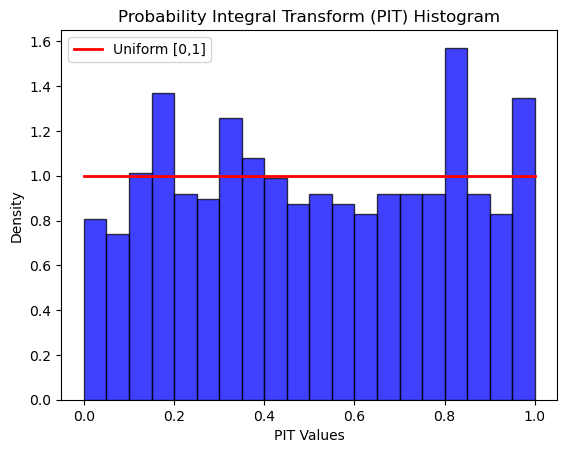

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from scipy.stats import uniform

# Example quantile forecasts and observations
quantile_forecasts = lasso_array
observations = obs2

# Calculate PIT values
pit_values = np.zeros_like(quantile_forecasts)

for i in range(quantile_forecasts.shape[1]):
    sorted_forecasts = np.sort(quantile_forecasts[:, i])
    ecdf_values = np.linspace(0, 1, len(sorted_forecasts))
    pit_values[:, i] = np.interp(
        quantile_forecasts[:, i], sorted_forecasts, ecdf_values)

# Create PIT histogram
fig, ax = plt.subplots()
ax.hist(pit_values.flatten(), bins=20, density=True,
        alpha=0.75, color='blue', edgecolor='black')

# Plot the uniform distribution for reference
x = np.linspace(0, 1, 100)
ax.plot(x, uniform.pdf(x), 'r-', lw=2, label='Uniform [0,1]')

ax.set_title('Probability Integral Transform (PIT)')
ax.set_xlabel('PIT Values')
ax.set_ylabel('Density')
ax.legend()

plt.show()